# Difference Explorer

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mannwhitneyu
pd.set_option('display.max_columns', None)


INPUT_FILE_NAME_BERLIN = 'cases_berlin-preprocessed-gesetzgebung-2006-2020_with_context.csv'
INPUT_FILE_NAME_BRANDENBURG = 'cases_brandenburg-preprocessed-gesetzgebung-2006-2020_processed_with_context.csv'
INPUT_FILE_NAME_BAWUE = 'cases_baden-württemberg-preprocessed-gesetzgebung-gesetz-2006-2020_processed_with_context.csv'
'''

INPUT_FILE_NAME_BERLIN = 'cases_berlin-preprocessed-gesetzgebung-2006-2020_with_context_passed_bills.csv'
INPUT_FILE_NAME_BRANDENBURG = 'cases_brandenburg-preprocessed-gesetzgebung-2006-2020_processed_with_context_passed_bills.csv'
INPUT_FILE_NAME_BAWUE = 'cases_baden-württemberg-preprocessed-gesetzgebung-gesetz-2006-2020_processed_with_context_passed_bills.csv'
'''

def read_and_sanitize(file_name):
    df = pd.read_csv(file_name)
    print('Read', len(df), 'rows from', file_name)
    df = df.dropna(axis=1, how='all')  # drop all completely empty columns
    return df

df_berlin = read_and_sanitize(INPUT_FILE_NAME_BERLIN)
df_brandenburg = read_and_sanitize(INPUT_FILE_NAME_BRANDENBURG)
df_baWue = read_and_sanitize(INPUT_FILE_NAME_BAWUE)

Read 731 rows from cases_berlin-preprocessed-gesetzgebung-2006-2020_with_context.csv
Read 718 rows from cases_brandenburg-preprocessed-gesetzgebung-2006-2020_processed_with_context.csv
Read 1005 rows from cases_baden-württemberg-preprocessed-gesetzgebung-gesetz-2006-2020_processed_with_context.csv


In [9]:
columns_to_exclude = ['case_id', '.delay', '.start', "start_time", ".count", "DokTyp", "VSys", "Vorgangs", "start_month", "start_weekday", "urheber_first_activity_"]
columns_to_include = [col for col in df_berlin.columns if not any(exclude in col for exclude in columns_to_exclude)]

#for col in columns_to_include:
#    print(col)

print(np.median(df_berlin['event_count']))

df_berlin[columns_to_include].describe(include='all')

7.0


,event_count,duration,case:author_first_activity,case:author_first_activity_count,case:WIP_during_start,case:pdf_bytes,case:pdf_word_count,case:squire,case:salary,case:staff,case:commDays,case:plenDays,case:af_score,case:is_election_year,case:yearly_frequency,case:yearly_cycle_time,case:yearly_arrival_rate,case:yearly_variants,case:author_first_activity_bündnis 90/die grünen (grüne),case:author_first_activity_nan,case:author_first_activity_ausschuss,case:author_first_activity_sozialdemokratische partei deutschlands (spd),case:author_first_activity_partei des demokratischen sozialismus (die linkspartei.pds),case:author_first_activity_freie demokratische partei (fdp),case:author_first_activity_christlich demokratische union deutschlands (cdu),case:author_first_activity_die linke fraktion berlin (die linke),case:author_first_activity_piraten (piraten),case:author_first_activity_alternative für deutschland (afd),is_passed_bill
count,731.000000,731.000000,264,264.000000,731.000000,7.310000e+02,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731
unique,NaN,NaN,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Bündnis 90/Die GRÜNEN (Grüne),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
freq,NaN,NaN,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550
mean,7.145007,176.337893,NaN,1.886364,25.469220,3.251295e+05,9733.939808,0.273447,3626.398865,92478.372734,154.146375,15.932969,-0.589158,0.218878,52.057456,186.721272,6.957715,25.967168,0.138167,0.638851,0.0,0.134063,0.020520,0.082079,0.131327,0.112175,0.035568,0.023256,NaN
std,7.046677,243.034000,NaN,1.331957,9.894655,9.285751e+05,19398.397251,0.018297,665.843589,14379.014555,29.991947,2.693400,0.088447,0.413769,10.425179,64.010629,1.551825,5.727752,0.345311,0.480663,0.0,0.340953,0.141867,0.274674,0.337989,0.315798,0.185337,0.150818,NaN
min,1.000000,0.000000,NaN,1.000000,1.000000,0.000000e+00,0.000000,0.237486,3200.650879,53266.820312,106.000000,7.000000,-0.796095,0.000000,35.000000,99.700000,4.970000,18.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,6.000000,50.000000,NaN,1.000000,19.000000,3.597650e+04,599.500000,0.259550,3352.238770,84028.226562,126.000000,16.000000,-0.656308,0.000000,46.000000,138.750000,6.020000,20.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,7.000000,99.000000,NaN,1.000000,27.000000,1.024230e+05,2856.000000,0.279797,3469.618896,96454.914062,154.000000,17.000000,-0.548334,0.000000,50.000000,181.800000,6.730000,24.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,8.000000,196.500000,NaN,2.000000,33.000000,2.685375e+05,9715.500000,0.283423,3668.627441,101195.789062,179.000000,17.000000,-0.526893,0.000000,57.000000,230.980000,7.620000,32.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


In [ ]:
columns_to_include = [col for col in df_brandenburg.columns if not any(exclude in col for exclude in columns_to_exclude)]
df_brandenburg[columns_to_include].describe(include='all')

,event_count,duration,case:author_first_activity,case:author_first_activity_count,case:WIP_during_start,case:pdf_bytes,case:pdf_word_count,case:squire,case:salary,case:staff,case:commDays,case:plenDays,case:af_score,case:is_election_year,case:yearly_frequency,case:yearly_cycle_time,case:yearly_arrival_rate,case:yearly_variants,case:author_first_activity_landesregierung,case:author_first_activity_die linkspartei.pds (die linkspartei.pds),case:author_first_activity_landtag,case:author_first_activity_ausschuss,case:author_first_activity_nan,case:author_first_activity_deutsche volksunion (dvu),case:author_first_activity_präsidium des landtages,"case:author_first_activity_fritsch, gunter (präsident des landtages brandenburg)",case:author_first_activity_sozialdemokratische partei deutschlands (spd),case:author_first_activity_christlich demokratische union deutschlands (cdu),case:author_first_activity_die linke (die linke),case:author_first_activity_[.lookup error 75] (cdu),case:author_first_activity_fraktion bündnis 90/die grünen (b90/grüne),case:author_first_activity_freie demokratische partei (fdp),case:author_first_activity_rat für sorbische (wendische) angelegenheiten,"case:author_first_activity_bischoff, mike (spd)","case:author_first_activity_görke, christian (die linke)","case:author_first_activity_halem, marie luise von (b90/grüne)","case:author_first_activity_senftleben, ingo (cdu)","case:author_first_activity_vogdt, marion (fdp)",case:author_first_activity_enquete-kommission 5/2,"case:author_first_activity_kircheis, kerstin (spd)","case:author_first_activity_lipsdorf, jens (fdp)","case:author_first_activity_maresch, jürgen (die linke)","case:author_first_activity_schier, roswitha (cdu)","case:author_first_activity_schierack, prof. dr. michael (cdu)","case:author_first_activity_schippel, werner-siegwart (spd)","case:author_first_activity_schulz-höpfner, monika (cdu)","case:author_first_activity_wöllert, birgit (die linke)","case:author_first_activity_domres, thomas (die linke)","case:author_first_activity_hoffmann, dr. gerd-rüdiger (fraktionslos)","case:author_first_activity_stark, britta (präsidentin des landtages brandenburg)","case:author_first_activity_vida, péter (fraktionslos)",case:author_first_activity_alternative für deutschland (afd),"case:author_first_activity_redmann, dr. jan (cdu)","case:author_first_activity_nonnemacher, ursula (b90/grüne)",case:author_first_activity_brandenburger vereinigte bürgerbewegungen / freie wähler gruppe (bvb / freie wähler gruppe),case:author_first_activity_rat für angelegenheiten der sorben/wenden,"case:author_first_activity_schulze, christoph (fraktionslos)","case:author_first_activity_schülzke, iris (fraktionslos)",case:author_first_activity_enquete-kommission 6/1,"case:author_first_activity_lüttmann, björn (spd)","case:author_first_activity_bommert, frank (cdu)","case:author_first_activity_genilke, rainer (cdu)","case:author_first_activity_lakenmacher, björn (cdu)","case:author_first_activity_loehr, matthias (die linke)","case:author_first_activity_liedtke, prof. dr. ulrike (präsidentin des landtages brandenburg)",case:author_first_activity_brandenburger vereinigte bürgerbewegungen / freie wähler gruppe (bvb/fw),"case:author_first_activity_bretz, steeven (cdu)","case:author_first_activity_damus, sahra (b90/grüne)","case:author_first_activity_keller, daniel (spd)","case:author_first_activity_schäffer, marie (b90/grüne)",is_passed_bill
count,718.000000,718.000000,709,709.000000,718.000000,7.180000e+02,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.0,718.0,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.0,718.000000,718.000000,718.0,718.000000,718.000000,718.000000,718.000000,718.000000,718.0,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.0,718.000000,718.000000,718.000000,718.000000,71

In [5]:
columns_to_include = [col for col in df_baWue.columns if not any(exclude in col for exclude in columns_to_exclude)]
df_baWue[columns_to_include].describe(include='all')

,event_count,duration,case:author_first_activity,case:author_first_activity_count,case:WIP_during_start,case:pdf_bytes,case:pdf_word_count,case:squire,case:salary,case:staff,case:commDays,case:plenDays,case:af_score,case:is_election_year,case:yearly_frequency,case:yearly_cycle_time,case:yearly_arrival_rate,case:yearly_variants,case:author_first_activity_christlich-demokratische union (cdu),case:author_first_activity_freie demokratische partei / demokratische volkspartei (fdp/dvp),case:author_first_activity_landesregierung,case:author_first_activity_sozialdemokratische partei deutschlands (spd),case:author_first_activity_nan,case:author_first_activity_ausschuss,case:author_first_activity_präsident des landtags,case:author_first_activity_bündnis 90/die grünen (grüne),"case:author_first_activity_mack, winfried (cdu)","case:author_first_activity_untersteller, franz (grüne)","case:author_first_activity_kübler, jochen k. (cdu)","case:author_first_activity_winkler, alfred (spd)","case:author_first_activity_bullinger, friedrich (fdp/dvp)","case:author_first_activity_murschel, bernd (grüne)","case:author_first_activity_ministerium für wissenschaft, forschung und kunst",case:author_first_activity_präsidentin des landtags,case:author_first_activity_alternative für deutschland (afd),is_passed_bill
count,1005.000000,1005.000000,933,933.000000,1005.000000,1.005000e+03,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.0,1005.0,1005.000000,1005.0,1005.000000,1005.0,1005.0,1005.0,1005.0,1005.0,1005.0,1005.000000,1005
unique,NaN,NaN,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Landesregierung,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,NaN,376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,693
mean,6.237811,60.963184,NaN,1.681672,43.266667,2.280700e+06,12204.780100,0.401770,6285.172016,108111.546253,115.111443,24.180100,-0.109461,0.105473,113.021891,61.380776,4.493741,45.124378,0.153234,0.139303,0.390050,0.224876,0.071642,0.0,0.0,0.216915,0.0,0.000995,0.0,0.0,0.0,0.0,0.0,0.0,0.021891,NaN
std,3.615505,94.877755,NaN,0.810643,34.434656,3.748501e+06,16642.632916,0.039002,1000.479742,38129.595485,13.067154,3.972315,0.191303,0.307314,59.806074,30.777498,3.380864,16.749307,0.360392,0.346435,0.488004,0.417708,0.258022,0.0,0.0,0.412350,0.0,0.031544,0.0,0.0,0.0,0.0,0.0,0.0,0.146399,NaN
min,1.000000,0.000000,NaN,1.000000,0.000000,0.000000e+00,0.000000,0.356298,5415.236328,80610.859375,63.000000,10.000000,-0.319046,0.000000,4.000000,16.500000,1.910000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN
25%,3.000000,15.000000,NaN,1.000000,16.000000,1.391170e+05,4071.000000,0.370450,5445.312500,81927.773438,117.000000,22.000000,-0.207136,0.000000,56.000000,42.060000,1.950000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN
50%,6.000000,32.000000,NaN,2.000000,27.000000,4.736310e+05,9843.000000,0.388927,5558.568359,84375.000000,117.000000,26.000000,-0.179548,0.000000,153.000000,42.120000,2.200000,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN
75%,7.000000,71.000000,NaN,2.000000,74.000000,2.938516e+06,15328.000000,0.442227,7334.673340,135965.328125,117.000000,27.000000,0.023638,0.000000,173.000000,89.970000,5.910000,60.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN


In [ ]:
'''
for df in [df_berlin, df_brandenburg, df_baWue]:
    property = df['case:yearly_variants']
    print(f"{np.mean(property).round(2)} & {np.median(property).round(2)} & {np.std(property).round(2)}", end=" & ")
'''

25.97 & 24.0 & 5.72 & 38.44 & 39.0 & 9.1 & 45.12 & 54.0 & 16.74 & 

/tmp/ipykernel_1704/268770511.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Region', y='duration', data=combined_df,


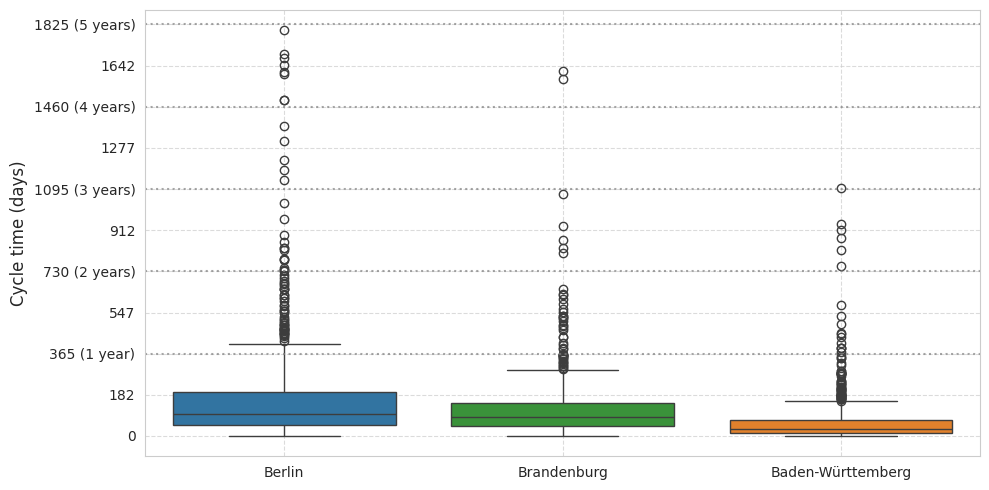

In [6]:
# Combine the data into a single DataFrame for plotting
df_berlin['Region'] = 'Berlin'
df_brandenburg['Region'] = 'Brandenburg'
df_baWue['Region'] = 'Baden-Württemberg'

combined_df = pd.concat([df_berlin[['duration', 'Region']], 
                         df_brandenburg[['duration', 'Region']], 
                         df_baWue[['duration', 'Region']]])

# Set a clean style
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))

# Create a color palette matching the one used in plot_fun_overall
# These are the default matplotlib colors
color_palette = {
    'Berlin': '#1f77b4',      # blue
    'Baden-Württemberg': '#ff7f0e', # orange
    'Brandenburg': '#2ca02c'  # green
}

# Create a simple but effective box plot
ax = sns.boxplot(x='Region', y='duration', data=combined_df,
                palette=color_palette)

# Explicitly set x-label to empty string
ax.set_xlabel('')
plt.ylabel('Cycle time (days)', fontsize=12)

# Add grid matching the other plot
plt.grid(True, linestyle='--', alpha=0.7)

# Add specific markings up to 5 years, with half-year intervals
days_in_year = 365
days_in_half_year = days_in_year / 2

# Create ticks at regular half-year intervals up to 5 years
half_year_ticks = [i * days_in_half_year for i in range(11)]  # 0 to 5 years in half-year steps

# Set y-axis ticks
ax.set_yticks(half_year_ticks)

# Create tick labels with year markers only for full years
def format_tick(x):
    years = x / days_in_year
    
    if years.is_integer():
        if years == 0:
            return "0"
        return f"{int(x)} ({int(years)} year{'s' if years > 1 else ''})"
    else:
        return str(int(x))

ax.set_yticklabels([format_tick(tick) for tick in half_year_ticks])

# Highlight the full year markers
for year in range(1, 6):  # Up to 5 years
    days = year * days_in_year
    plt.axhline(y=days, color='gray', linestyle=':', alpha=0.7)

# Ensure the plot is not cluttered
plt.tight_layout()
plt.savefig("cycleTime_boxplots.png", dpi=600)
plt.show()

In [7]:
print(f"Mann-Whitney U test - berlin vs brandenburg", mannwhitneyu(df_berlin["duration"], df_brandenburg["duration"]))
print(f"Mann-Whitney U test - berlin vs bawue", mannwhitneyu(df_berlin["duration"], df_baWue["duration"]))
print(f"Mann-Whitney U test - brandenburg vs bawue", mannwhitneyu(df_brandenburg["duration"], df_baWue["duration"]))

Mann-Whitney U test - berlin vs brandenburg MannwhitneyuResult(statistic=292817.0, pvalue=0.00013552255074421353)
Mann-Whitney U test - berlin vs bawue MannwhitneyuResult(statistic=541776.0, pvalue=3.123936174824349e-64)
Mann-Whitney U test - brandenburg vs bawue MannwhitneyuResult(statistic=512024.0, pvalue=6.308547763368503e-50)
